<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Sep8-9/Clase_09sep_McL_BRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Se importan las librerias necesarias
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor #Método de gradiente decendiente
from sklearn.preprocessing import StandardScaler #Normaliza los datos
from sklearn.model_selection import train_test_split #Permite separar eñ conjunto de datos en uno de entrenamiento y uno de validación
import pandas as pd
from IPython.display import Image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1 Se analiza la base datos
La base de datos es de 205 autos

In [11]:
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/CarPrice_Assignment.csv"
from pandas.core.api import DataFrame
datac=pd.read_csv("/content/drive/MyDrive/Machine_Learn/CarPrice_Assignment.csv")
#Se deslpiegan los datos
datac.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


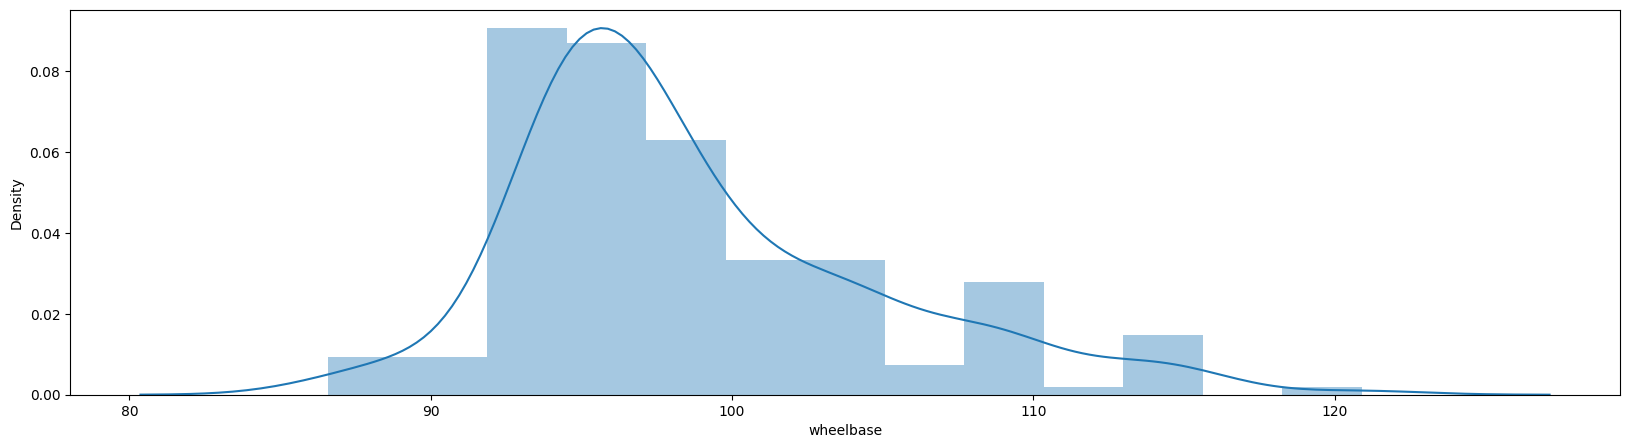

In [96]:
#Variables categoricas
datac['symboling'].astype('category').value_counts()
plt.figure(figsize=(20,5))
sns.distplot(datac['wheelbase'])
plt.show()

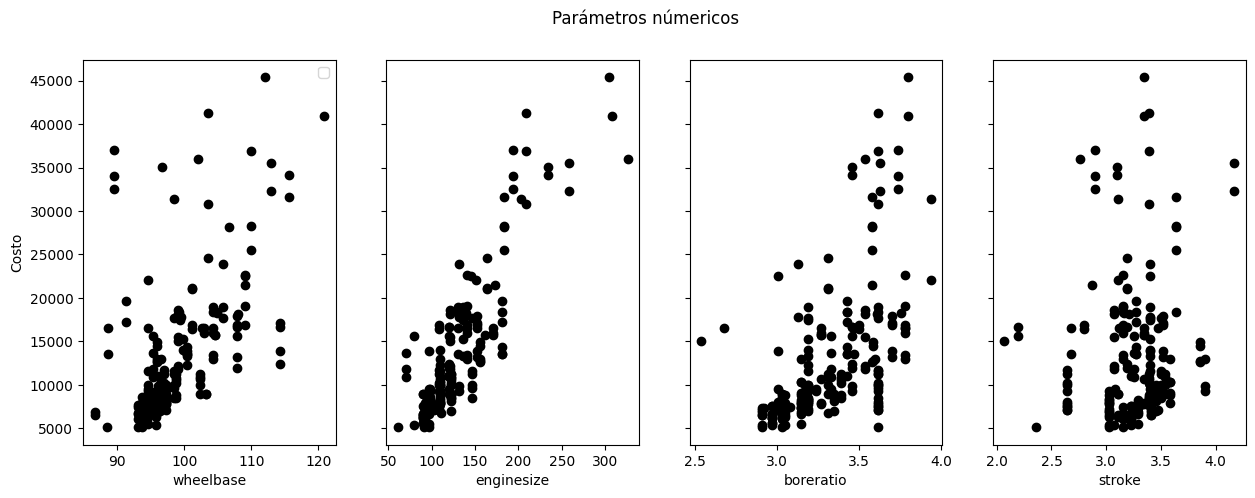

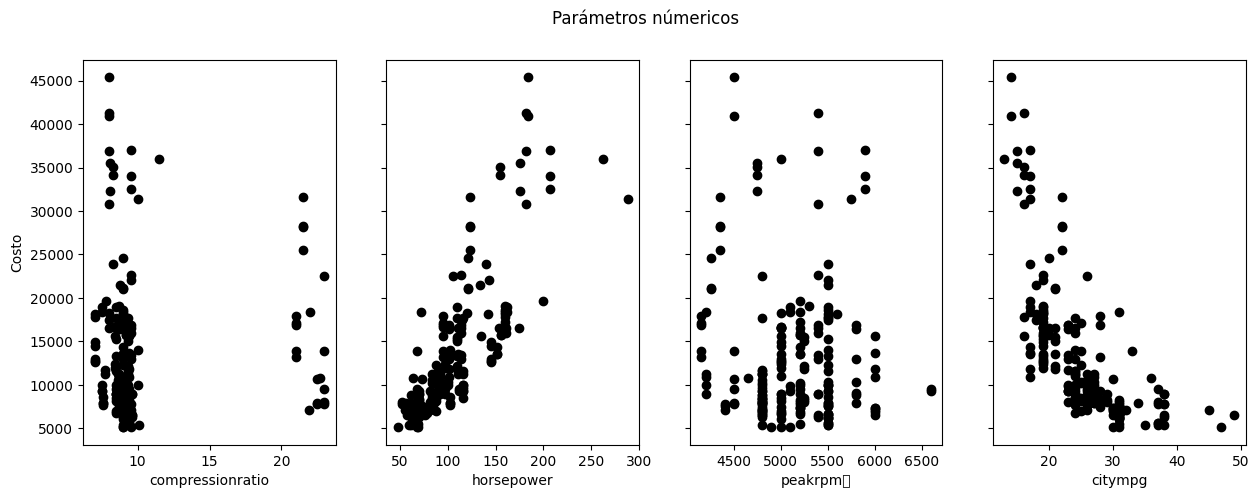

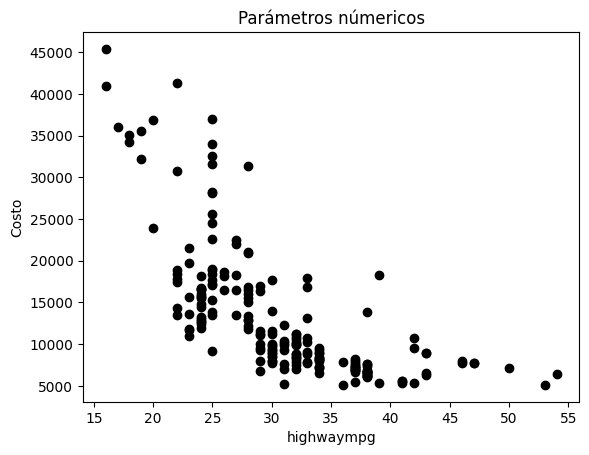

In [63]:
#Variables númericas
costc = datac['price']
vnum =np.array([datac['wheelbase'],datac['enginesize'],datac['boreratio'],datac['stroke'],datac['compressionratio'],datac['horsepower'],datac['peakrpm'],datac['citympg'],datac['highwaympg']])
labels =['wheelbase','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm	','citympg','highwaympg']
fig,ax=plt.subplots(1,4,figsize=(15, 5),sharey=True)
fig.suptitle("Parámetros númericos")
for i in range(4):
    ax[i].scatter(vnum[i,:],costc,color="black")
    ax[i].set_xlabel(labels[i])
ax[0].set_ylabel("Costo"); ax[0].legend();
plt.show()
fig,ax=plt.subplots(1,4,figsize=(15, 5),sharey=True)
fig.suptitle("Parámetros númericos")
for i in range(4):
    ax[i].scatter(vnum[i+4,:],costc,color="black")
    ax[i].set_xlabel(labels[i+4])
ax[0].set_ylabel("Costo");
plt.show()
plt.title('Parámetros númericos')
plt.xlabel('highwaympg')
plt.ylabel("Costo");
plt.scatter(vnum[8,:],costc,color="black")
plt.show()

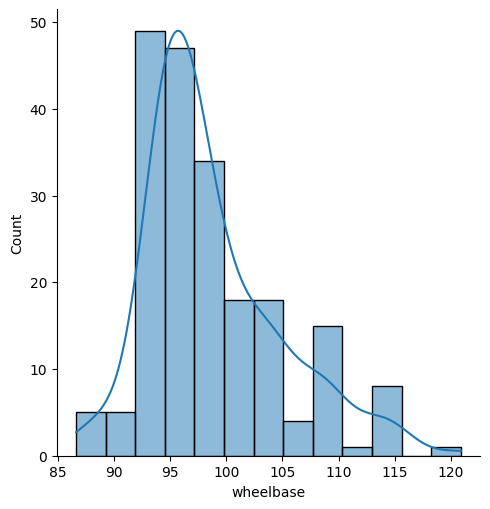

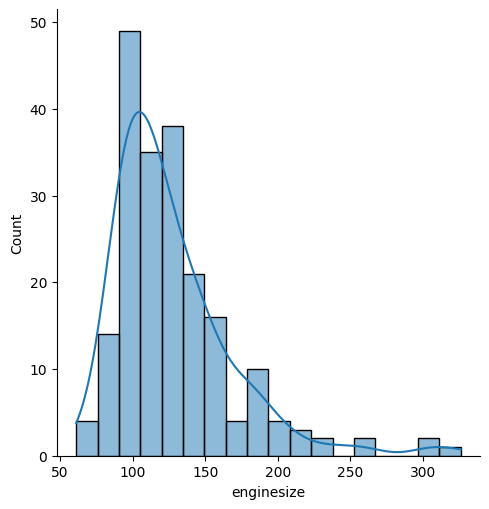

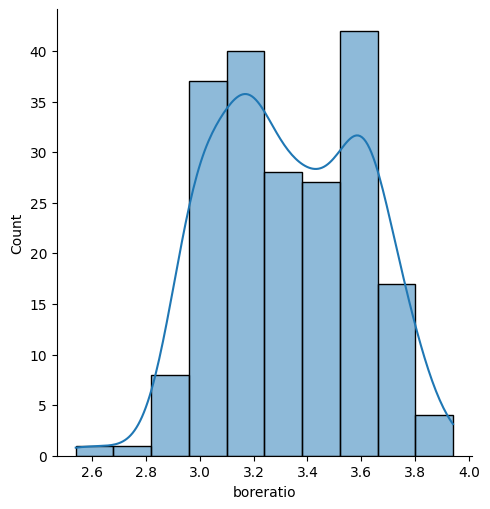

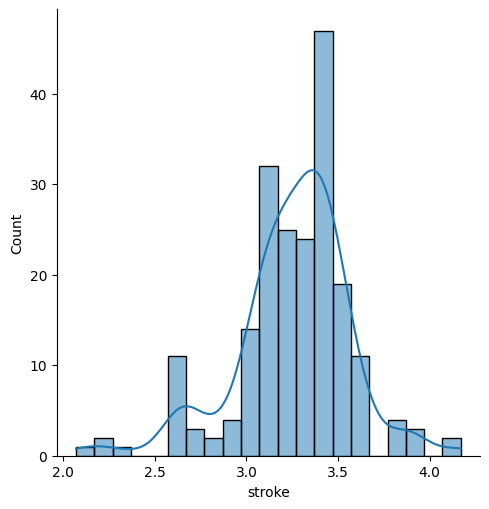

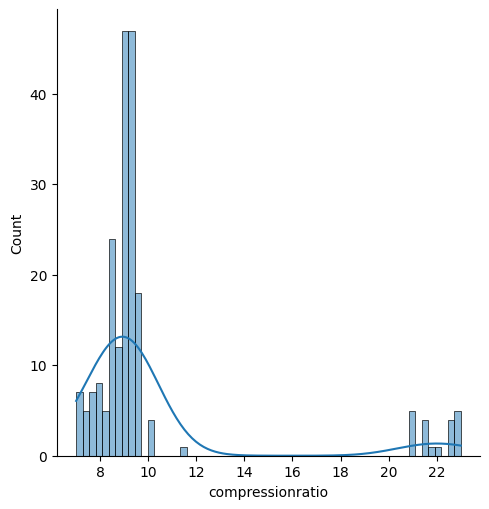

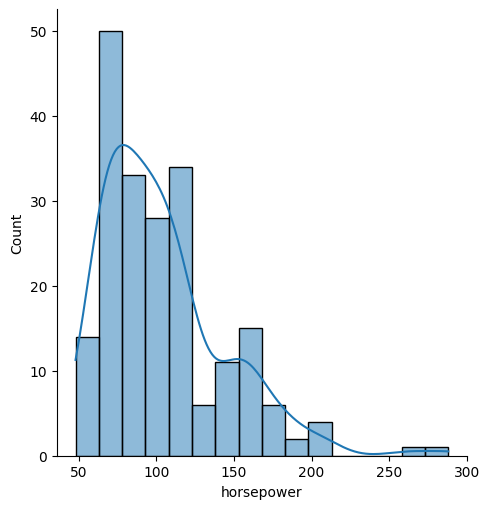

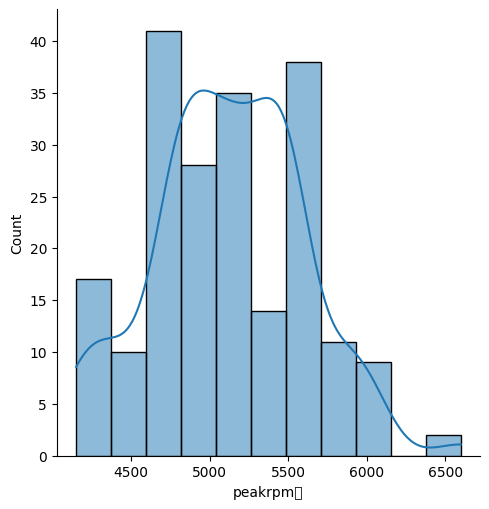

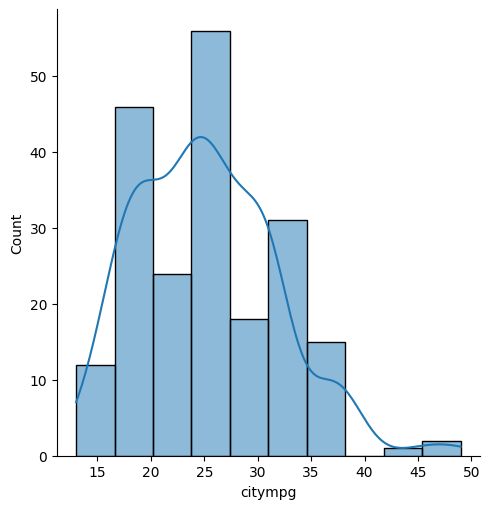

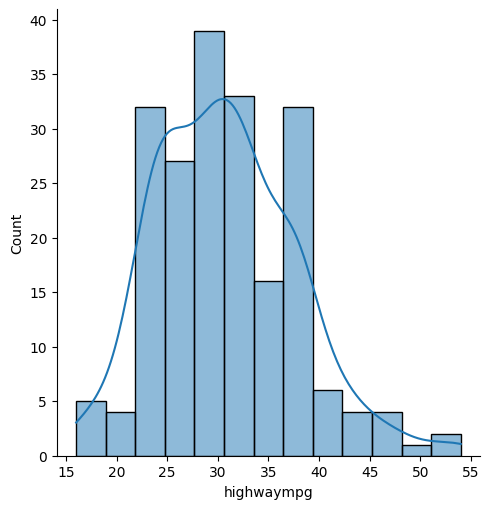

In [94]:
#histogramas de densidad
for i in range(9):
  sns.displot(data=vnum[i], kde=True,aspect=1)
  plt.xlabel(labels[i])
  plt.show()


Despues de un breve análisis las variables seleccionadas para un primer modelo seran: